In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline


In [2]:
# 1월에 가입한 유저들중 한달, 두달, 세달 동안 일별 상품 등록 수
one = pd.read_csv('for_1month.csv')
two = pd.read_csv('for_2month.csv')
three = pd.read_csv('for_3month.csv')

In [19]:
one_uid = one['uid'].astype(int).unique().tolist()
two_uid = two['uid'].astype(int).unique().tolist()
three_uid = three['uid'].astype(int).unique().tolist()

In [37]:
for col in one.columns:
    one[col] = one[col].astype(str)
for col in two.columns:
    two[col] = two[col].astype(str)
for col in three.columns:
    three[col] = three[col].astype(str)

# 유저가 가입하고 한달동안 등록 물건 수

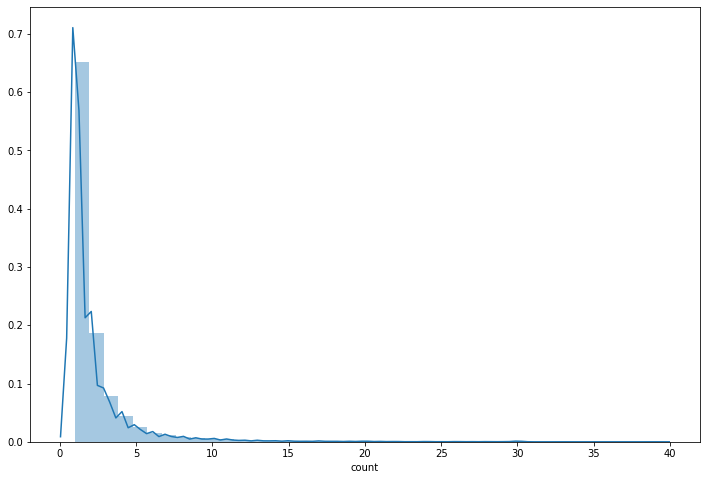

In [45]:
plt.figure(figsize=(12, 8))
sns.distplot(one['count'], bins=40)

In [49]:
one.groupby('uid', as_index=False)['day'].count()['day'].describe()

count    21015.000000
mean         1.913348
std          2.068647
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: day, dtype: float64

In [85]:
one.groupby('uid', as_index=False)['day'].count()['day'].describe()

count    21015.000000
mean         1.913348
std          2.068647
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: day, dtype: float64

In [86]:
one.groupby('uid', as_index=False)['day'].count()['day'].median()

1.0

In [60]:
sample_uid = ['10636189','10704396','10736284','10551834','10714317','10723278','10562385','10616391','10716470','10645815', '10646618', '10624497', '10594714', '10700491', '10646154', '10729995']




In [62]:
# 한달동안 20일 이상 올린 유저중 16명 샘플링
sample = one[one['uid'].isin(sample_uid)]

In [71]:
sample[sample['uid'] == '10562385'].sort_values('day').to_csv('sample1.csv', index=False)
sample[sample['uid'] == '10551834'].sort_values('day').to_csv('sample2.csv', index=False)
sample[sample['uid'] == '10716470'].sort_values('day').to_csv('sample3.csv', index=False)

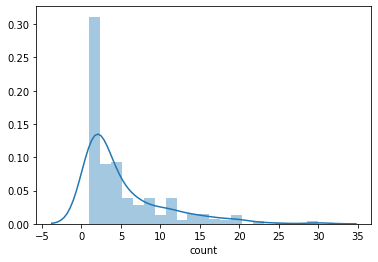

In [73]:
sns.distplot(sample['count'])

In [77]:
sample['count'] = sample['count'].astype(int)
sample['count'].describe()

/Users/emilyPark/.pyenv/versions/3.7.5/envs/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    377.000000
mean       5.156499
std        5.219584
min        1.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       30.000000
Name: count, dtype: float64

In [87]:
sample['count'].median()

3.0

In [119]:
print(sample.groupby('uid',as_index=False)['count'].sum()['count'].mean())
print(sample.groupby('uid',as_index=False)['count'].sum()['count'].median())

121.5
107.5


Text(0.5, 0, 'product count')

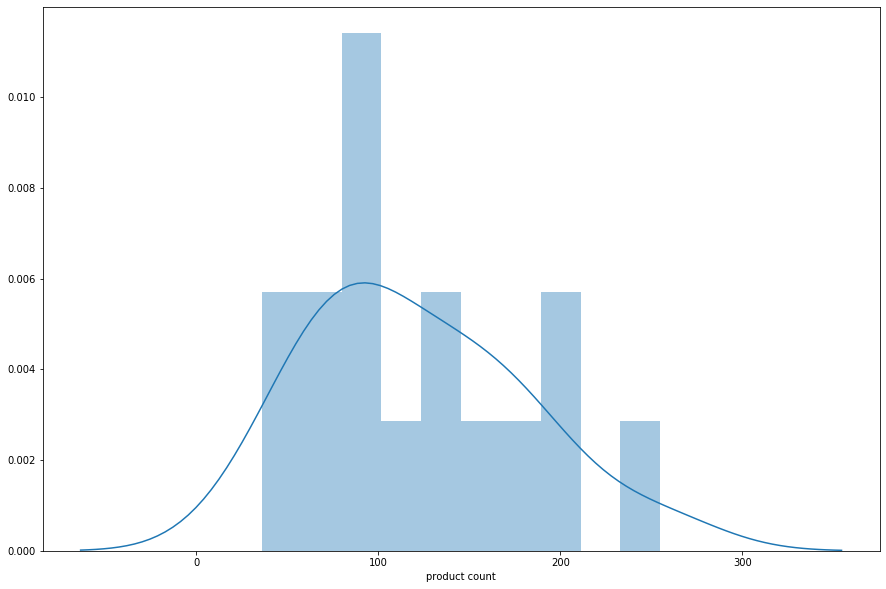

In [118]:
plt.figure(figsize=(15,10))
sns.distplot(sample.groupby('uid',as_index=False)['count'].sum()['count'], bins=10)
plt.xlabel('product count')

In [79]:
one['count'] = one['count'].astype(int)
one['count'].describe()

count    40209.000000
mean         2.117685
std          2.627930
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         39.000000
Name: count, dtype: float64

In [83]:
one['count'].median()

1.0

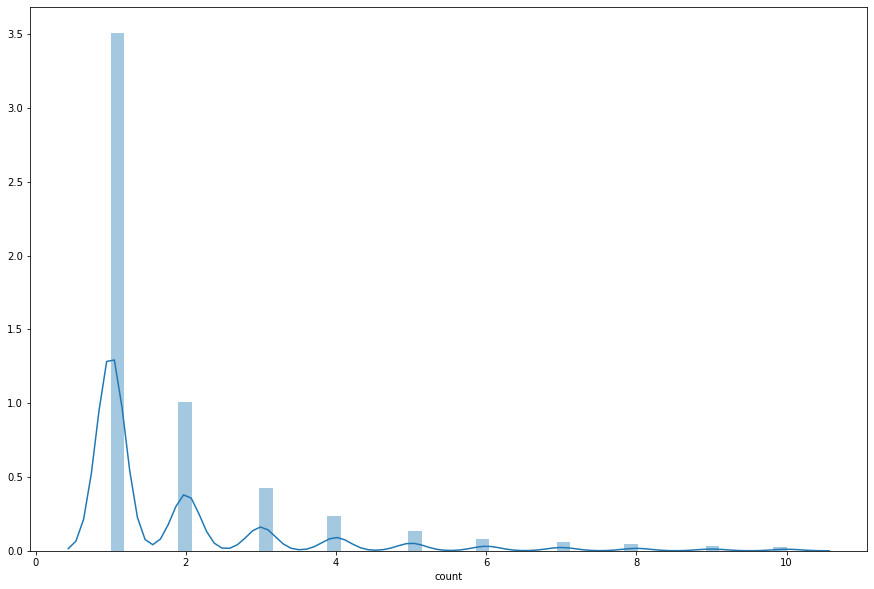

In [82]:
plt.figure(figsize=(15,10))
sns.distplot(one[one['count'] <= 10]['count'])

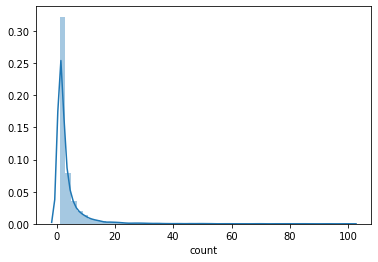

In [103]:
month = one.groupby('uid', as_index=False)['count'].sum()
sns.distplot(month[month['count'] <= 100]['count'])

Text(0.5, 0, 'product count')

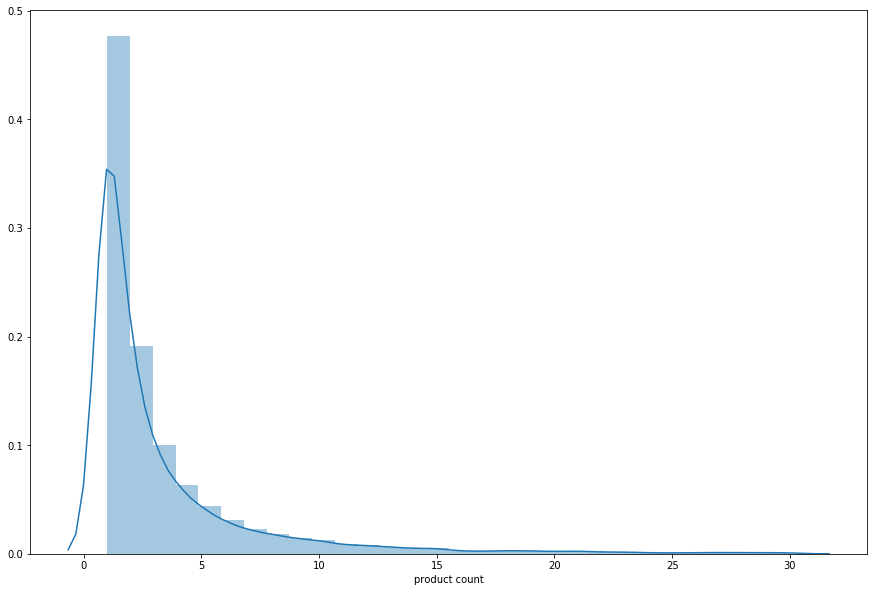

In [110]:
plt.figure(figsize=(15,10))
sns.distplot(month[month['count'] <= 30]['count'], bins=30)
plt.xlabel('product count')

In [126]:
print(len(month[month['count'] <= 5])/len(month))
print(len(month[month['count'] <= 20])/len(month))

print(len(month[month['count'] <= 30])/len(month))
print(len(month[month['count'] <= 50])/len(month))

0.8352605281941471
0.9742088984059005
0.9867713537949084
0.9943373780632881


In [127]:
month_biz = biz.groupby('uid', as_index=False)['count'].sum()


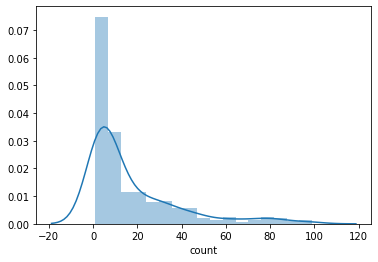

In [134]:
sns.distplot(month_biz[month_biz['count'] <= 100]['count'])

In [135]:
print(len(month_biz[month_biz['count'] <= 5])/len(month_biz))
print(len(month[month['count'] <= 5])/len(month))
print()
print(len(month_biz[month_biz['count'] <= 10])/len(month_biz))
print(len(month[month['count'] <= 10])/len(month))
print()
print(len(month_biz[month_biz['count'] <= 15])/len(month_biz))
print(len(month[month['count'] <= 15])/len(month))
print()
print(len(month_biz[month_biz['count'] <= 20])/len(month_biz))
print(len(month[month['count'] <= 20])/len(month))
print()
print(len(month_biz[month_biz['count'] <= 30])/len(month_biz))
print(len(month[month['count'] <= 30])/len(month))
print()
print(len(month_biz[month_biz['count'] <= 40])/len(month_biz))
print(len(month[month['count'] <= 40])/len(month))
print()

0.35526315789473684
0.8352605281941471

0.5210526315789473
0.9298596240780395

0.5894736842105263
0.9617416131334761

0.6368421052631579
0.9742088984059005

0.7105263157894737
0.9867713537949084

0.7736842105263158
0.9914822745657863



In [138]:
len(month)

21015

In [102]:
month['count'].describe()

count    21015.000000
mean         4.051868
std          9.758884
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        576.000000
Name: count, dtype: float64

In [111]:
month['count'].median()

2.0

# 1월동안 가입한 전문상점이 한달간 등록하는 상품 수

In [122]:
biz = pd.read_csv('pcnt_biz.csv')

In [124]:
print(biz['count'].mean())
print(biz['count'].median())
print()
print(biz.groupby('uid', as_index=False)['day'].count()['day'].mean())
print(biz.groupby('uid', as_index=False)['day'].count()['day'].median())
print()
print(biz.groupby('uid', as_index=False)['count'].sum()['count'].mean())
print(biz.groupby('uid', as_index=False)['count'].sum()['count'].median())

7.168886978942845
3.0

6.123684210526315
4.0

43.9
10.0


# 2020-04-01에 가입한 일반 상점들의 상품 수

In [89]:
pcnt = pd.read_csv('joindate_base_pcnt.csv')

In [91]:
pcnt['p_cnt'].describe()

count    935.000000
mean       6.610695
std       22.935444
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      408.000000
Name: p_cnt, dtype: float64

In [92]:
pcnt['p_cnt'].median()

2.0

Text(0.5, 0, 'product count per user')

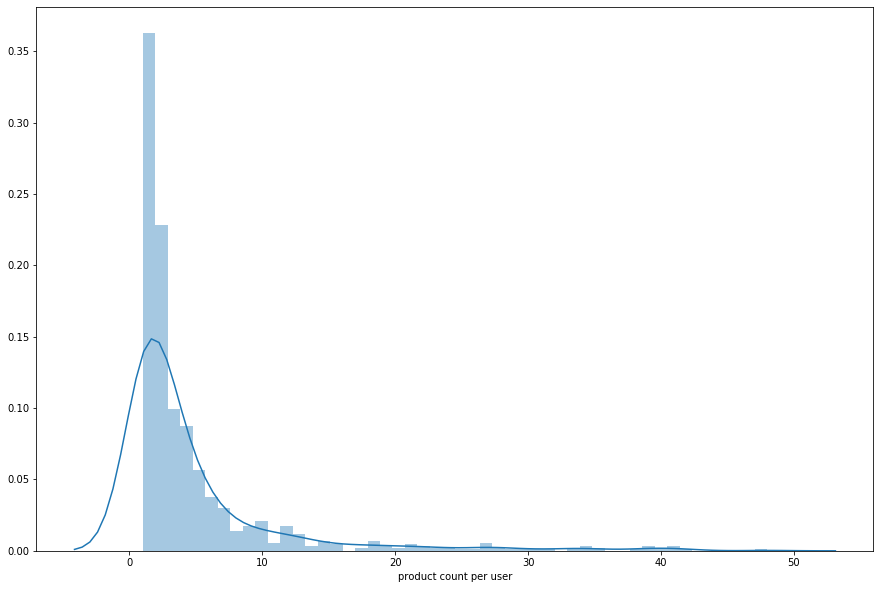

In [96]:
plt.figure(figsize=(15,10))
sns.distplot(pcnt[pcnt['p_cnt'] <= 50]['p_cnt'])
plt.xlabel('product count per user')

In [97]:
pcnt0301 = pd.read_csv('0301base_pcnt.csv')

In [98]:
pcnt0301['p_cnt'].describe()

count    1186.000000
mean        5.688870
std        12.591076
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       195.000000
Name: p_cnt, dtype: float64

In [99]:
pcnt0301['p_cnt'].median()

2.0